In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
tax = pd.read_csv('taxonomy.tsv', sep='\t')

In [6]:
countries = ['AUT', 'CAN', 'CHN', 'FRA', 'IND', 'ITA', 'JPN', 'USA']
annos = []
exps = []
for country in countries:
    annos.append(pd.read_csv(f'{country}/anno.csv'))
    exps.append(pd.read_csv(f'{country}/exp.csv'))

anno = pd.concat(annos)
exp = pd.concat(exps)

In [7]:
anno.head()

,sample,HQ_clean_read_count,gut_mapped_read_count,gut_mapped_pc,oral_mapped_read_count,oral_mapped_pc,MGS_10.4,MGS_8.4,MGS_all,low_read,...,body_site,body_subsite,health_status,host_phenotype,host_subphenotype,gender,age,bmi,class,to_exclude
0,ERS608554,47561376,39639265,83.343394,1389166,2.920804,274,41,290,NaN,...,gut,stool,P,adenoma,advanced adenoma,male,70.0,34.11,adenoma,NaN
1,ERS608563,62048458,50252720,80.989474,2039141,3.286378,166,56,196,NaN,...,gut,stool,P,adenoma,advanced adenoma,male,67.0,27.14,adenoma,NaN
2,ERS608565,58857214,48715189,82.768425,2761927,4.692602,267,55,300,NaN,...,gut,stool,P,adenoma,advanced adenoma,male,62.0,26.88,adenoma,NaN
3,ERS608544,51542668,42229049,81.930274,4571250,8.868884,187,122,280,NaN,...,gut,stool,P,adenoma,advanced adenoma,female,69.0,24.13,adenoma,NaN
4,ERS608558,41507164,32689325,78.755862,1671800,4.027765,382,38,405,NaN,...,gut,stool,P,adenoma,advanced adenoma,male,62.0,30.10,adenoma,NaN


In [8]:
exp.head()

,Unnamed: 0,msp_0001,msp_0002,msp_0003,msp_0004,msp_0005,msp_0006,msp_0007,msp_0008,msp_0009,...,msp_2942,msp_2943,msp_2944,msp_2945,msp_2946,msp_2947,msp_2948,msp_2949,msp_2950,msp_2951
0,ERS608599,0.0,0.0,0.000000e+00,0.0,1.172156e-08,0.0,4.534005e-07,0.000000e+00,0.000000e+00,...,0.0,1.979261e-08,9.494069e-08,0.0,0.0,0.0,0.0,0.0,3.328858e-09,0.0
1,ERS608499,0.0,0.0,8.468557e-07,0.0,3.438613e-08,0.0,4.105906e-09,1.709384e-09,3.349903e-09,...,0.0,0.000000e+00,8.931996e-09,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
2,ERS608489,0.0,0.0,0.000000e+00,0.0,6.702451e-09,0.0,2.235867e-07,1.934289e-06,1.788240e-08,...,0.0,0.000000e+00,4.515798e-08,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
3,ERS608554,0.0,0.0,3.438610e-07,0.0,2.627544e-09,0.0,6.645863e-08,0.000000e+00,2.114582e-08,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
4,ERS608521,0.0,0.0,1.518499e-09,0.0,2.586790e-08,0.0,3.360986e-08,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,2.163579e-08,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0


In [9]:
exp_renamed = exp.rename(columns={'Unnamed: 0': 'sample'})

In [72]:
anno_sorted = anno.sort_values(by='sample')
exp_sorted = exp_renamed.sort_values(by='sample')

In [73]:
selection = ['sample', 'HQ_clean_read_count', 'gut_mapped_read_count', 'gut_mapped_pc', 'oral_mapped_read_count',
             'oral_mapped_pc', 'MGS_10.4', 'MGS_8.4', 'MGS_all', 'instrument_model', 'country', 'timepoint',
             'health_status', 'host_phenotype', 'gender', 'age', 'bmi']
anno_selected = pd.DataFrame(anno_sorted[selection])

In [74]:
anno_clear = anno_selected.dropna()

In [75]:
anno_clear.head(3)

,sample,HQ_clean_read_count,gut_mapped_read_count,gut_mapped_pc,oral_mapped_read_count,oral_mapped_pc,MGS_10.4,MGS_8.4,MGS_all,instrument_model,country,timepoint,health_status,host_phenotype,gender,age,bmi
410,DRS087519,56699388,46527947,82.06,4845304,8.55,318,102,379,Illumina HiSeq 2500,JPN,t1,H,healthy,female,67.00,21.91
47,DRS087520,44248228,38640117,87.33,4626419,10.46,146,51,173,Illumina HiSeq 2500,JPN,t1,P,adenoma,male,58.00,22.86
27,DRS087521,61075048,52325441,85.67,3626648,5.94,172,17,175,Illumina HiSeq 2500,JPN,t1,P,adenoma,female,65.00,20.43


In [14]:
anno_clear['host_phenotype'].value_counts()

healthy    566
CRC        486
adenoma    154
Name: host_phenotype, dtype: int64

In [15]:
def health_to_int(cell):
    if cell == 'H':
        # Healthy equal 0
        return 0
    elif cell == 'P':
        return 1

def host_phenotype_to_int(cell):
    if cell == 'healthy':
        # Healthy equal 0
        return 0
    elif cell == 'CRC':
        return 1
    elif cell == 'adenoma':
        return -1

def gender_to_int(cell):
    if cell == 'male':
        return 1
    elif cell == 'female':
        return 0

In [16]:
anno_clear['health_status'] = anno_clear['health_status'].apply(health_to_int)
anno_clear['host_phenotype'] = anno_clear['host_phenotype'].apply(host_phenotype_to_int)
anno_clear['gender'] = anno_clear['gender'].apply(gender_to_int)
anno_dummied = pd.get_dummies(anno_clear, columns=['instrument_model', 'country', 'timepoint'])

/tmp/ipykernel_82351/190366474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anno_clear['health_status'] = anno_clear['health_status'].apply(health_to_int)
/tmp/ipykernel_82351/190366474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anno_clear['host_phenotype'] = anno_clear['host_phenotype'].apply(host_phenotype_to_int)
/tmp/ipykernel_82351/190366474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [17]:
anno_dummied.columns

Index(['sample', 'HQ_clean_read_count', 'gut_mapped_read_count',
       'gut_mapped_pc', 'oral_mapped_read_count', 'oral_mapped_pc', 'MGS_10.4',
       'MGS_8.4', 'MGS_all', 'health_status', 'host_phenotype', 'gender',
       'age', 'bmi', 'instrument_model_Illumina HiSeq 2000',
       'instrument_model_Illumina HiSeq 2500',
       'instrument_model_Illumina HiSeq 4000', 'instrument_model_NextSeq 500',
       'country_AUT', 'country_CAN', 'country_CHN', 'country_FRA',
       'country_IND', 'country_ITA', 'country_JPN', 'country_USA',
       'timepoint_t1', 'timepoint_t2'],
      dtype='object')

In [86]:
selection = ['sample', 'MGS_8.4', 'health_status', 'host_phenotype', 'gender', 'age', 'bmi', 'country_AUT',
                 'country_CAN', 'country_CHN', 'country_FRA', 'country_IND', 'country_ITA', 'country_JPN',
                 'country_USA', 'timepoint_t1', 'timepoint_t2']
anno_final = anno_dummied[selection]

In [87]:
anno_final

,sample,MGS_8.4,health_status,host_phenotype,gender,age,bmi,country_AUT,country_CAN,country_CHN,country_FRA,country_IND,country_ITA,country_JPN,country_USA,timepoint_t1,timepoint_t2
410,DRS087519,102,0,0,0,67.00,21.91,0,0,0,0,0,0,1,0,1,0
47,DRS087520,51,1,-1,1,58.00,22.86,0,0,0,0,0,0,1,0,1,0
27,DRS087521,17,1,-1,0,65.00,20.43,0,0,0,0,0,0,1,0,1,0
21,DRS087522,59,1,-1,1,64.00,18.78,0,0,0,0,0,0,1,0,1,0
20,DRS087523,60,1,-1,1,64.00,24.16,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,SRS4597858,28,1,1,0,56.00,22.22,0,0,0,0,1,0,0,0,1,0
66,SRS4597860,19,1,1,1,59.00,19.10,0,0,0,0,1,0,0,0,1,0
65,SRS4597862,25,1,1,0,75.00,21.21,0,0,0,0,1,0,0,0,1,0
70,SRS4597863,16,1,1,1,64.00,20.08,0,0,0,0,1,0,0,0,1,0


In [88]:
data_shorted = pd.merge(anno_final, exp_sorted, on='sample', how='inner')

In [89]:
data_shorted

,sample,MGS_8.4,health_status,host_phenotype,gender,age,bmi,country_AUT,country_CAN,country_CHN,...,msp_2942,msp_2943,msp_2944,msp_2945,msp_2946,msp_2947,msp_2948,msp_2949,msp_2950,msp_2951
0,DRS087519,102,0,0,0,67.00,21.91,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,DRS087520,51,1,-1,1,58.00,22.86,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DRS087521,17,1,-1,0,65.00,20.43,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,DRS087522,59,1,-1,1,64.00,18.78,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,DRS087523,60,1,-1,1,64.00,24.16,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,SRS4597858,28,1,1,0,56.00,22.22,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1202,SRS4597860,19,1,1,1,59.00,19.10,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1203,SRS4597862,25,1,1,0,75.00,21.21,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1204,SRS4597863,16,1,1,1,64.00,20.08,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [90]:
data_shorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Columns: 2481 entries, sample to msp_2951
dtypes: float64(2466), int64(4), object(1), uint8(10)
memory usage: 22.8+ MB


In [91]:
# data.to_csv('data.csv', index=False)
data = pd.read_csv('data.csv')

In [24]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

/home/dimon/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
# Feature for proving and Proving our data
def check_missing_values(dataframe):

    if dataframe.isnull().sum().sum() > 0:
        m_total = dataframe.isnull().sum().sort_values(ascending=False)
        total = m_total[m_total > 0]

        m_percent = dataframe.isnull().mean().sort_values(ascending=False)
        percent = m_percent[m_percent > 0]

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

        print(f'Total and Percentage of NaN:\n {missing_data}')
    else:
        print('No NaN found.')

In [26]:
check_missing_values(data)

No NaN found.


In [27]:
data.head(3)

,sample,gut_mapped_pc,oral_mapped_pc,MGS_10.4,MGS_8.4,MGS_all,health_status,host_phenotype,gender,age,...,msp_2942,msp_2943,msp_2944,msp_2945,msp_2946,msp_2947,msp_2948,msp_2949,msp_2950,msp_2951
0,DRS087519,82.06,8.55,318,102,379,0,0,0,67.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,DRS087520,87.33,10.46,146,51,173,1,-1,1,58.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DRS087521,85.67,5.94,172,17,175,1,-1,0,65.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [28]:
X = data.drop(['sample', 'gut_mapped_pc', 'oral_mapped_pc', 'health_status', 'host_phenotype'], axis=1)
y = data['health_status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define and build the lazyclassifier
lazyclf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train, predictions_train = lazyclf.fit(X_train, X_train, y_train, y_train)

100%|██████████| 29/29 [00:35<00:00,  1.23s/it]


In [31]:
# Performance table of the training set (80% subset)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,1.00,1.00,0.56
LabelSpreading,1.00,1.00,1.00,1.00,0.47
XGBClassifier,1.00,1.00,1.00,1.00,2.51
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.60
RidgeClassifier,1.00,1.00,1.00,1.00,0.36
RandomForestClassifier,1.00,1.00,1.00,1.00,0.88
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,1.48
Perceptron,1.00,1.00,1.00,1.00,0.21
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.26


In [32]:
# Performance table of the test set (20% subset)
predictions_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,1.00,1.00,0.56
LabelSpreading,1.00,1.00,1.00,1.00,0.47
XGBClassifier,1.00,1.00,1.00,1.00,2.51
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.60
RidgeClassifier,1.00,1.00,1.00,1.00,0.36
RandomForestClassifier,1.00,1.00,1.00,1.00,0.88
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,1.48
Perceptron,1.00,1.00,1.00,1.00,0.21
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.26


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
predictions = clf.predict(X_test)

In [36]:
accuracy_score(y_test, predictions)

0.5661157024793388

In [92]:
check_missing_values(data_shorted)

No NaN found.


In [93]:
data_shorted.head(3)

,sample,MGS_8.4,health_status,host_phenotype,gender,age,bmi,country_AUT,country_CAN,country_CHN,...,msp_2942,msp_2943,msp_2944,msp_2945,msp_2946,msp_2947,msp_2948,msp_2949,msp_2950,msp_2951
0,DRS087519,102,0,0,0,67.00,21.91,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,DRS087520,51,1,-1,1,58.00,22.86,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DRS087521,17,1,-1,0,65.00,20.43,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [94]:
X_sh = data_shorted.drop(['sample', 'health_status', 'host_phenotype'], axis=1)
y_sh = data_shorted['health_status']

In [95]:
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(X_sh, y_sh, test_size=0.2, random_state=42)

In [96]:
clf_sh = DecisionTreeClassifier(random_state=0)
clf_sh.fit(X_train_sh, y_train_sh)

DecisionTreeClassifier(random_state=0)

In [98]:
predictions_sh = clf_sh.predict(X_test_sh)
accuracy_score(y_test_sh, predictions_sh)

0.6074380165289256

In [100]:
X_c = data_shorted.drop(['sample', 'health_status', 'host_phenotype', 'country_AUT', 'country_CAN', 'country_CHN',
                         'country_FRA', 'country_IND', 'country_ITA', 'country_JPN', 'country_USA'], axis=1)
y_c = data_shorted['health_status']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
clf_c = DecisionTreeClassifier(random_state=0)
clf_c.fit(X_train_c, y_train_c)
predictions_c = clf_c.predict(X_test_c)
accuracy_score(y_test_c, predictions_c)

0.5619834710743802

In [103]:
X_t = data_shorted.drop(['sample', 'health_status', 'host_phenotype', 'timepoint_t1', 'timepoint_t2'], axis=1)
y_t = data_shorted['health_status']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42)
clf_t = DecisionTreeClassifier(random_state=0)
clf_t.fit(X_train_t, y_train_t)
predictions_t = clf_t.predict(X_test_t)
accuracy_score(y_test_t, predictions_t)

0.5743801652892562

In [104]:
X_t = data_shorted.drop(['sample', 'health_status', 'host_phenotype', 'timepoint_t1', 'timepoint_t2','country_AUT',
                         'country_CAN', 'country_CHN',
                         'country_FRA', 'country_IND', 'country_ITA', 'country_JPN', 'country_USA'], axis=1)
y_t = data_shorted['health_status']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=42)
clf_t = DecisionTreeClassifier(random_state=0)
clf_t.fit(X_train_t, y_train_t)
predictions_t = clf_t.predict(X_test_t)
accuracy_score(y_test_t, predictions_t)

0.5702479338842975

In [77]:
def instrument_to_int(cell):
    if cell == 'Illumina HiSeq 2500':
        return 0
    elif cell == 'Illumina HiSeq 2000':
        return 1
    elif cell == 'NextSeq 500':
        return 2
    elif cell == 'Illumina HiSeq 4000':
        return 3

def country_to_int(cell):
    if cell == 'JPN':
        return 0
    elif cell == 'AUT':
        return 1
    elif cell == 'FRA':
        return 2
    elif cell == 'USA':
        return 3
    elif cell == 'CHN':
        return 4
    elif cell == 'ITA':
        return 5
    elif cell == 'IND':
        return 6
    elif cell == 'CAN':
        return 7

def time_to_int(cell):
    if cell == 't1':
        return 0
    elif cell == 't2':
        return 1

In [78]:
anno_clear_0 = anno_clear.copy()

In [82]:
anno_clear_0['instrument_model'] = anno_clear_0['instrument_model'].apply(instrument_to_int)
anno_clear_0['country'] = anno_clear_0['country'].apply(country_to_int)
anno_clear_0['timepoint'] = anno_clear_0['timepoint'].apply(time_to_int)
anno_clear_0['health_status'] = anno_clear_0['health_status'].apply(health_to_int)
anno_clear_0['host_phenotype'] = anno_clear_0['host_phenotype'].apply(host_phenotype_to_int)
anno_clear_0['gender'] = anno_clear_0['gender'].apply(gender_to_int)

In [83]:
anno_clear_0

,sample,HQ_clean_read_count,gut_mapped_read_count,gut_mapped_pc,oral_mapped_read_count,oral_mapped_pc,MGS_10.4,MGS_8.4,MGS_all,instrument_model,country,timepoint,health_status,host_phenotype,gender,age,bmi
410,DRS087519,56699388,46527947,82.06,4845304,8.55,318,102,379,0,0,0,0,0,0,67.00,21.91
47,DRS087520,44248228,38640117,87.33,4626419,10.46,146,51,173,0,0,0,1,-1,1,58.00,22.86
27,DRS087521,61075048,52325441,85.67,3626648,5.94,172,17,175,0,0,0,1,-1,0,65.00,20.43
21,DRS087522,63102874,52297381,82.88,3050888,4.83,393,59,418,0,0,0,1,-1,1,64.00,18.78
20,DRS087523,80043632,64857719,81.03,4496341,5.62,255,60,279,0,0,0,1,-1,1,64.00,24.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,SRS4597858,4664112,3830684,82.13,736590,15.79,65,28,73,2,6,0,1,1,0,56.00,22.22
66,SRS4597860,7266846,5819176,80.08,1267229,17.44,178,19,180,2,6,0,1,1,1,59.00,19.10
65,SRS4597862,7217302,5510443,76.35,399147,5.53,225,25,232,2,6,0,1,1,0,75.00,21.21
70,SRS4597863,6823298,4953884,72.60,185526,2.72,285,16,289,2,6,0,1,1,1,64.00,20.08


In [84]:
# Is there any correlation between columns?
correlations = anno_clear_0.corrwith(anno_clear_0['health_status']).iloc[:].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

<AxesSubplot:>

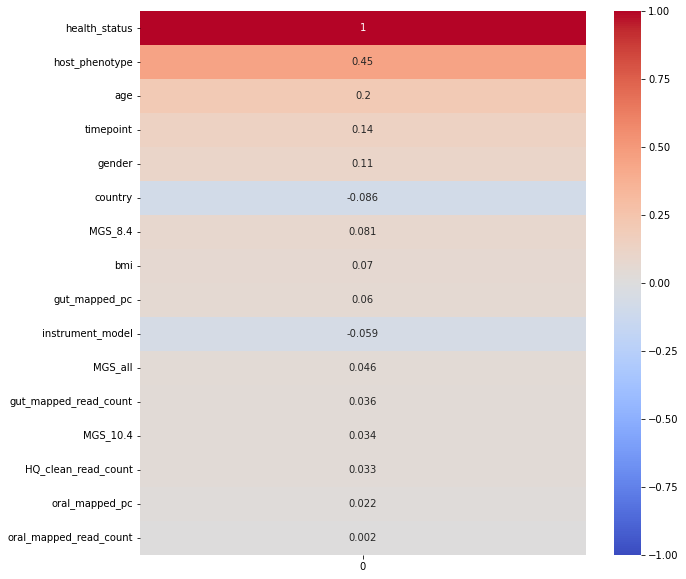

<Figure size 720x1440 with 0 Axes>

In [85]:
# Visualising results of the corr
# Sorted_correlations
fig, ax = plt.subplots(figsize=(10,10))
plt.figure(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, ax=ax)

In [ ]:
new_selection = ['sample', 'MGS_8.4', 'health_status', 'host_phenotype', 'gender', 'age', 'bmi', 'country_AUT',
                 'country_CAN', 'country_CHN', 'country_FRA', 'country_IND', 'country_ITA', 'country_JPN',
                 'country_USA', 'timepoint_t1', 'timepoint_t2']
data_0 = data

In [105]:
data_shorted

,sample,MGS_8.4,health_status,host_phenotype,gender,age,bmi,country_AUT,country_CAN,country_CHN,...,msp_2942,msp_2943,msp_2944,msp_2945,msp_2946,msp_2947,msp_2948,msp_2949,msp_2950,msp_2951
0,DRS087519,102,0,0,0,67.00,21.91,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,DRS087520,51,1,-1,1,58.00,22.86,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DRS087521,17,1,-1,0,65.00,20.43,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,DRS087522,59,1,-1,1,64.00,18.78,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,DRS087523,60,1,-1,1,64.00,24.16,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,SRS4597858,28,1,1,0,56.00,22.22,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1202,SRS4597860,19,1,1,1,59.00,19.10,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1203,SRS4597862,25,1,1,0,75.00,21.21,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1204,SRS4597863,16,1,1,1,64.00,20.08,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [108]:
X_ = data_shorted.drop(['sample', 'health_status', 'host_phenotype'], axis=1)
y_ = data_shorted['health_status']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)
clf_ = DecisionTreeClassifier(random_state=0)
clf_.fit(X_train_, y_train_)
predictions_ = clf_.predict(X_test_)
accuracy_score(y_test_, predictions_)

0.6074380165289256

In [107]:
X__ = data_shorted.drop(['sample', 'health_status', 'host_phenotype'], axis=1)
y__ = data_shorted['host_phenotype']
X_train__, X_test__, y_train__, y_test__ = train_test_split(X__, y__, test_size=0.2, random_state=42)
clf__ = DecisionTreeClassifier(random_state=0)
clf__.fit(X_train__, y_train__)
predictions__ = clf__.predict(X_test__)
accuracy_score(y_test__, predictions__)

0.41735537190082644

In [126]:
# Define and build the lazyclassifier
lazy = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train, predictions_train = lazy.fit(X_train_, X_test_, y_train_, y_test_)

100%|██████████| 29/29 [00:26<00:00,  1.07it/s]


In [127]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.61,0.61,0.61,0.61,1.00
RandomForestClassifier,0.59,0.59,0.59,0.59,0.77
BaggingClassifier,0.58,0.59,0.59,0.58,3.47
LGBMClassifier,0.59,0.59,0.59,0.59,2.14
XGBClassifier,0.59,0.59,0.59,0.59,1.74
AdaBoostClassifier,0.55,0.56,0.56,0.55,2.88
SGDClassifier,0.56,0.55,0.55,0.56,0.21
BernoulliNB,0.54,0.55,0.55,0.54,0.19
DecisionTreeClassifier,0.54,0.55,0.55,0.54,0.45


In [131]:
from sklearn.ensemble import RandomForestClassifier
clf_new = RandomForestClassifier(random_state=0)
clf_new.fit(X_train_, y_train_)
predictions_new = clf_new.predict(X_test_)
accuracy_score(y_test_, predictions_new)

0.5702479338842975

In [109]:
tax

,catalogue,Taxo_level,species,genus,family,order,class,phylum,superkingdom,knowledge
msp_0001,gut,species,Blastocystis sp. subtype 3,Blastocystis,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,known
msp_0002,gut,species,Blastocystis sp. subtype 1,Blastocystis,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,known
msp_0003,gut,species,Bacteroides cellulosilyticus,Bacteroides,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
msp_0004,gut,species,Blastocystis sp. subtype 2,Blastocystis,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,known
msp_0005,gut & oral,species,Escherichia coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,known
...,...,...,...,...,...,...,...,...,...,...
msp_2947,oral,genus,unclassified Prevotella,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,unknown
msp_2948,oral,family,unclassified Rikenellaceae 3,unclassified Rikenellaceae 3,Rikenellaceae 3,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,unknown
msp_2949,oral,species,Cutibacterium acnes,Cutibacterium,Propionibacteriaceae,Propionibacteriales,Actinobacteria,Actinobacteriota,Bacteria,known
msp_2950,oral,genus,unclassified Granulicatella,Granulicatella,Aerococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria,unknown


In [113]:
tax['order'].value_counts()

Bacteroidales            361
Lachnospirales           334
Oscillospirales          215
Clostridiales            184
Clostridiales 2          108
                        ... 
Gracilibacteria BD1-5      1
Mycoplasmatales            1
Caulobacterales            1
Xanthomonadales            1
Rhizobiales                1
Name: order, Length: 63, dtype: int64

In [119]:
df = tax['order']
classes = []
for row in df.iteritems():
    classes.append(row)

In [132]:
dictio = {}
for clas in classes:
    if clas[1] in dictio:
        val = dictio[clas[1]]
        val.append(clas[0])
        dictio[clas[1]] = val
    else:
        dictio[clas[1]] = [clas[0]]

In [133]:
dictio

{'Eukaryota': ['msp_0001',
  'msp_0002',
  'msp_0004',
  'msp_0006',
  'msp_0864',
  'msp_1779c',
  'msp_2238',
  'msp_2819',
  'msp_2842',
  'msp_2857',
  'msp_2864',
  'msp_2868',
  'msp_2881'],
 'Bacteroidales': ['msp_0003',
  'msp_0007',
  'msp_0008',
  'msp_0010',
  'msp_0011',
  'msp_0012',
  'msp_0016',
  'msp_0019',
  'msp_0021',
  'msp_0022',
  'msp_0023',
  'msp_0027',
  'msp_0028',
  'msp_0031',
  'msp_0032',
  'msp_0033',
  'msp_0035',
  'msp_0036',
  'msp_0037',
  'msp_0040',
  'msp_0041',
  'msp_0043',
  'msp_0046',
  'msp_0051',
  'msp_0054',
  'msp_0059',
  'msp_0061',
  'msp_0062',
  'msp_0063',
  'msp_0064',
  'msp_0067',
  'msp_0069',
  'msp_0078',
  'msp_0080',
  'msp_0081',
  'msp_0083',
  'msp_0084',
  'msp_0088',
  'msp_0089',
  'msp_0090',
  'msp_0091',
  'msp_0096',
  'msp_0097',
  'msp_0098',
  'msp_0101',
  'msp_0102',
  'msp_0114',
  'msp_0117',
  'msp_0118',
  'msp_0122',
  'msp_0123',
  'msp_0128',
  'msp_0136',
  'msp_0137',
  'msp_0139',
  'msp_0143',
  

In [134]:
exp_copy = exp_sorted.copy()
exp_copy

,sample,msp_0001,msp_0002,msp_0003,msp_0004,msp_0005,msp_0006,msp_0007,msp_0008,msp_0009,...,msp_2942,msp_2943,msp_2944,msp_2945,msp_2946,msp_2947,msp_2948,msp_2949,msp_2950,msp_2951
223,DRS087519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
364,DRS087520,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
227,DRS087521,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
206,DRS087522,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
191,DRS087523,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,SRS6200692,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,SRS6200693,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,SRS6200694,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107,SRS6200695,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [136]:
for key in dictio:
    col_list = dictio[key]
    exp_copy[f'{key}'] = exp_copy[col_list].sum(axis=1)

In [163]:
selection = ['sample']
for key in dictio:
    selection.append(key)
exp_order = exp_copy[selection]
exp_order

,sample,Eukaryota,Bacteroidales,Enterobacterales,Lachnospirales,Clostridiales,Verrucomicrobiales,Christensenellales,Victivallales,Burkholderiales,...,Saccharimonadales,Anaerolineales,Absconditabacterales,Pseudomonadales,Desulfobulbales,Gracilibacteria BD1-5,Bacillales,Rhizobiales,Caulobacterales,Xanthomonadales
223,DRS087519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
364,DRS087520,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
227,DRS087521,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
206,DRS087522,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
191,DRS087523,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,SRS6200692,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,SRS6200693,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,SRS6200694,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107,SRS6200695,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [164]:
sel = ['sample']
for col in exp_order:
    if col == 'sample':
        continue
    exp_order[f'{col}_normalized'] = (exp_order[col] - exp_order[col].min()) / (exp_order[col].max() - exp_order[col].min())
    sel.append(f'{col}_normalized')

In [165]:
exp_order_old = exp_order.copy()
exp_order = exp_order[sel]
exp_order

,sample,Eukaryota_normalized,Bacteroidales_normalized,Enterobacterales_normalized,Lachnospirales_normalized,Clostridiales_normalized,Verrucomicrobiales_normalized,Christensenellales_normalized,Victivallales_normalized,Burkholderiales_normalized,...,Saccharimonadales_normalized,Anaerolineales_normalized,Absconditabacterales_normalized,Pseudomonadales_normalized,Desulfobulbales_normalized,Gracilibacteria BD1-5_normalized,Bacillales_normalized,Rhizobiales_normalized,Caulobacterales_normalized,Xanthomonadales_normalized
223,DRS087519,0.00,0.47,0.07,0.15,0.14,0.00,0.03,0.00,0.08,...,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.81
364,DRS087520,0.00,0.39,0.05,0.48,0.02,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
227,DRS087521,0.00,0.54,0.00,0.07,0.23,0.04,0.00,0.00,0.10,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
206,DRS087522,0.00,0.34,0.00,0.22,0.43,0.00,0.10,0.04,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
191,DRS087523,0.00,0.74,0.01,0.19,0.14,0.00,0.01,0.00,0.07,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,SRS6200692,0.00,0.74,0.00,0.07,0.17,0.01,0.00,0.02,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,SRS6200693,0.00,0.30,0.02,0.22,0.23,0.00,0.00,0.00,0.07,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,SRS6200694,0.00,0.49,0.03,0.20,0.29,0.00,0.00,0.00,0.09,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.00
107,SRS6200695,0.00,0.33,0.02,0.13,0.27,0.01,0.02,0.13,0.11,...,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [143]:
anno_default = anno_dummied.drop(columns=['HQ_clean_read_count', 'gut_mapped_read_count',
                                          'gut_mapped_pc', 'oral_mapped_read_count',
                                          'oral_mapped_pc', 'MGS_all', 'MGS_10.4',
                                          'instrument_model_Illumina HiSeq 2000',
                                          'instrument_model_Illumina HiSeq 2500',
                                          'instrument_model_Illumina HiSeq 4000',
                                          'instrument_model_NextSeq 500'])
anno_default

,sample,MGS_8.4,health_status,host_phenotype,gender,age,bmi,country_AUT,country_CAN,country_CHN,country_FRA,country_IND,country_ITA,country_JPN,country_USA,timepoint_t1,timepoint_t2
410,DRS087519,102,0,0,0,67.00,21.91,0,0,0,0,0,0,1,0,1,0
47,DRS087520,51,1,-1,1,58.00,22.86,0,0,0,0,0,0,1,0,1,0
27,DRS087521,17,1,-1,0,65.00,20.43,0,0,0,0,0,0,1,0,1,0
21,DRS087522,59,1,-1,1,64.00,18.78,0,0,0,0,0,0,1,0,1,0
20,DRS087523,60,1,-1,1,64.00,24.16,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,SRS4597858,28,1,1,0,56.00,22.22,0,0,0,0,1,0,0,0,1,0
66,SRS4597860,19,1,1,1,59.00,19.10,0,0,0,0,1,0,0,0,1,0
65,SRS4597862,25,1,1,0,75.00,21.21,0,0,0,0,1,0,0,0,1,0
70,SRS4597863,16,1,1,1,64.00,20.08,0,0,0,0,1,0,0,0,1,0


In [166]:
data_order = pd.merge(anno_default, exp_order, on='sample', how='inner')
data_order

,sample,MGS_8.4,health_status,host_phenotype,gender,age,bmi,country_AUT,country_CAN,country_CHN,...,Saccharimonadales_normalized,Anaerolineales_normalized,Absconditabacterales_normalized,Pseudomonadales_normalized,Desulfobulbales_normalized,Gracilibacteria BD1-5_normalized,Bacillales_normalized,Rhizobiales_normalized,Caulobacterales_normalized,Xanthomonadales_normalized
0,DRS087519,102,0,0,0,67.00,21.91,0,0,0,...,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.81
1,DRS087520,51,1,-1,1,58.00,22.86,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,DRS087521,17,1,-1,0,65.00,20.43,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,DRS087522,59,1,-1,1,64.00,18.78,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,DRS087523,60,1,-1,1,64.00,24.16,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,SRS4597858,28,1,1,0,56.00,22.22,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1202,SRS4597860,19,1,1,1,59.00,19.10,0,0,0,...,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1203,SRS4597862,25,1,1,0,75.00,21.21,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1204,SRS4597863,16,1,1,1,64.00,20.08,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [167]:
X_order = data_order.drop(['sample', 'health_status', 'host_phenotype'], axis=1)
y_order = data_order['health_status']
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X_order, y_order, test_size=0.2, random_state=42)

In [170]:
clf_order = RandomForestClassifier(random_state=0)
clf_order.fit(X_train_or, y_train_or)
predictions_or = clf_order.predict(X_test_or)
accuracy_score(y_test_or, predictions_or)

0.6074380165289256

In [171]:
tax['class'].value_counts()

Clostridia             1080
Bacteroidia             361
Bacilli                 285
Gammaproteobacteria     126
Actinobacteria          104
Negativicutes           100
unclassified             90
Coriobacteriia           67
Fusobacteriia            34
Saccharimonadia          28
Vampirovibrionia         27
Campylobacteria          20
Desulfovibrionia         19
Spirochaetia             18
Alphaproteobacteria      16
Verrucomicrobiae         14
Lentisphaeria            13
Eukaryota                13
Synergistia              12
Flavobacteriia            7
Peptococcia               6
Thermoplasmata            5
Gracilibacteria           5
Elusimicrobia             4
Methanobacteria           4
Anaerolineae              2
Bradimonadia              1
Brachyspirae              1
Desulfobulbia             1
Kiritimatiellae           1
Name: class, dtype: int64

In [172]:
df = tax['class']
classes = []
for row in df.iteritems():
    classes.append(row)

In [173]:
dictio = {}
for clas in classes:
    if clas[1] in dictio:
        val = dictio[clas[1]]
        val.append(clas[0])
        dictio[clas[1]] = val
    else:
        dictio[clas[1]] = [clas[0]]

In [174]:
for key in dictio:
    col_list = dictio[key]
    exp_copy[f'{key}'] = exp_copy[col_list].sum(axis=1)

In [176]:
selection = ['sample']
for key in dictio:
    selection.append(key)
exp_class = exp_copy[selection]
exp_class

,sample,Eukaryota,Bacteroidia,Gammaproteobacteria,Clostridia,Verrucomicrobiae,Lentisphaeria,Bacilli,Desulfovibrionia,Negativicutes,...,Spirochaetia,Peptococcia,Kiritimatiellae,Elusimicrobia,unclassified,Bradimonadia,Saccharimonadia,Anaerolineae,Gracilibacteria,Desulfobulbia
223,DRS087519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
364,DRS087520,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
227,DRS087521,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
206,DRS087522,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
191,DRS087523,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,SRS6200692,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,SRS6200693,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,SRS6200694,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107,SRS6200695,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [178]:
sel = ['sample']
for col in exp_class:
    if col == 'sample':
        continue
    exp_class[f'{col}_normalized'] = (exp_class[col] - exp_class[col].min()) / (exp_class[col].max() - exp_class[col].min())
    sel.append(f'{col}_normalized')

In [179]:
exp_class = exp_class[sel]
exp_class

,sample,Eukaryota_normalized,Bacteroidia_normalized,Gammaproteobacteria_normalized,Clostridia_normalized,Verrucomicrobiae_normalized,Lentisphaeria_normalized,Bacilli_normalized,Desulfovibrionia_normalized,Negativicutes_normalized,...,Spirochaetia_normalized,Peptococcia_normalized,Kiritimatiellae_normalized,Elusimicrobia_normalized,unclassified_normalized,Bradimonadia_normalized,Saccharimonadia_normalized,Anaerolineae_normalized,Gracilibacteria_normalized,Desulfobulbia_normalized
223,DRS087519,0.00,0.47,0.08,0.33,0.00,0.00,0.05,0.02,0.02,...,0.00,0.14,0.00,0.00,0.31,0.00,0.02,0.00,0.00,0.00
364,DRS087520,0.00,0.39,0.05,0.47,0.00,0.00,0.03,0.02,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
227,DRS087521,0.00,0.54,0.02,0.23,0.04,0.00,0.01,0.02,0.01,...,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00
206,DRS087522,0.00,0.34,0.01,0.56,0.00,0.04,0.02,0.00,0.05,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
191,DRS087523,0.00,0.74,0.02,0.28,0.00,0.00,0.11,0.00,0.03,...,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,SRS6200692,0.00,0.74,0.00,0.18,0.01,0.02,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,SRS6200693,0.00,0.30,0.03,0.41,0.00,0.00,0.02,0.03,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,SRS6200694,0.00,0.49,0.05,0.34,0.00,0.00,0.02,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
107,SRS6200695,0.00,0.33,0.04,0.34,0.01,0.13,0.06,0.03,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00


In [181]:
data_class = pd.merge(anno_default, exp_class, on='sample', how='inner')
data_class.head(2)

,sample,MGS_8.4,health_status,host_phenotype,gender,age,bmi,country_AUT,country_CAN,country_CHN,...,Spirochaetia_normalized,Peptococcia_normalized,Kiritimatiellae_normalized,Elusimicrobia_normalized,unclassified_normalized,Bradimonadia_normalized,Saccharimonadia_normalized,Anaerolineae_normalized,Gracilibacteria_normalized,Desulfobulbia_normalized
0,DRS087519,102,0,0,0,67.00,21.91,0,0,0,...,0.00,0.14,0.00,0.00,0.31,0.00,0.02,0.00,0.00,0.00
1,DRS087520,51,1,-1,1,58.00,22.86,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [182]:
X_class = data_class.drop(['sample', 'health_status', 'host_phenotype'], axis=1)
y_class = data_class['health_status']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
lazy_class = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = lazy_class.fit(X_train_class, X_test_class, y_train_class, y_test_class)
models
# clf_class = RandomForestClassifier(random_state=0)
# clf_class.fit(X_train_class, y_train_class)
# predictions_or = clf_order.predict(X_test_or)
# accuracy_score(y_test_or, predictions_or)

100%|██████████| 29/29 [00:03<00:00,  8.63it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.61,0.61,0.61,0.61,0.44
ExtraTreesClassifier,0.58,0.58,0.58,0.58,0.28
LinearSVC,0.57,0.58,0.58,0.58,0.20
CalibratedClassifierCV,0.57,0.58,0.58,0.58,0.59
BernoulliNB,0.57,0.58,0.58,0.57,0.02
AdaBoostClassifier,0.57,0.58,0.58,0.58,0.25
XGBClassifier,0.57,0.57,0.57,0.57,0.14
LinearDiscriminantAnalysis,0.57,0.57,0.57,0.57,0.05
RidgeClassifierCV,0.57,0.57,0.57,0.57,0.03


In [184]:
clf_class = RandomForestClassifier(random_state=0)
clf_class.fit(X_train_class, y_train_class)
predictions_class = clf_class.predict(X_test_class)
accuracy_score(y_test_class, predictions_class)

0.6198347107438017

In [186]:
X_train_class.columns

Index(['MGS_8.4', 'gender', 'age', 'bmi', 'country_AUT', 'country_CAN',
       'country_CHN', 'country_FRA', 'country_IND', 'country_ITA',
       'country_JPN', 'country_USA', 'timepoint_t1', 'timepoint_t2',
       'Eukaryota_normalized', 'Bacteroidia_normalized',
       'Gammaproteobacteria_normalized', 'Clostridia_normalized',
       'Verrucomicrobiae_normalized', 'Lentisphaeria_normalized',
       'Bacilli_normalized', 'Desulfovibrionia_normalized',
       'Negativicutes_normalized', 'Vampirovibrionia_normalized',
       'Actinobacteria_normalized', 'Alphaproteobacteria_normalized',
       'Fusobacteriia_normalized', 'Synergistia_normalized',
       'Brachyspirae_normalized', 'Coriobacteriia_normalized',
       'Methanobacteria_normalized', 'Flavobacteriia_normalized',
       'Campylobacteria_normalized', 'Thermoplasmata_normalized',
       'Spirochaetia_normalized', 'Peptococcia_normalized',
       'Kiritimatiellae_normalized', 'Elusimicrobia_normalized',
       'unclassified_norma

In [196]:
tax['class'].value_counts()

Clostridia             1080
Bacteroidia             361
Bacilli                 285
Gammaproteobacteria     126
Actinobacteria          104
Negativicutes           100
unclassified             90
Coriobacteriia           67
Fusobacteriia            34
Saccharimonadia          28
Vampirovibrionia         27
Campylobacteria          20
Desulfovibrionia         19
Spirochaetia             18
Alphaproteobacteria      16
Verrucomicrobiae         14
Lentisphaeria            13
Eukaryota                13
Synergistia              12
Flavobacteriia            7
Peptococcia               6
Thermoplasmata            5
Gracilibacteria           5
Elusimicrobia             4
Methanobacteria           4
Anaerolineae              2
Bradimonadia              1
Brachyspirae              1
Desulfobulbia             1
Kiritimatiellae           1
Name: class, dtype: int64

In [197]:
drop_col = ['Desulfobulbia_normalized', 'Kiritimatiellae_normalized', 'Brachyspirae_normalized', 'Bradimonadia_normalized', 'Anaerolineae_normalized'] #unclassified_normalized
x_tr, x_tst, y_tr, y_tst = X_train_class.drop(columns=drop_col), X_test_class.drop(columns=drop_col), y_train_class.drop(columns=drop_col), y_test_class.drop(columns=drop_col)

In [198]:
lazy_prob = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_prob, predictions_prob = lazy_prob.fit(x_tr, x_tst, y_tr, y_tst)
models_prob

100%|██████████| 29/29 [00:03<00:00,  8.40it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.63,0.64,0.64,0.63,0.29
ExtraTreeClassifier,0.61,0.61,0.61,0.61,0.02
AdaBoostClassifier,0.60,0.60,0.60,0.60,0.24
RandomForestClassifier,0.60,0.60,0.60,0.60,0.43
LGBMClassifier,0.60,0.60,0.60,0.60,0.33
LinearSVC,0.57,0.58,0.58,0.58,0.17
CalibratedClassifierCV,0.57,0.57,0.57,0.57,0.61
NearestCentroid,0.57,0.57,0.57,0.57,0.02
BernoulliNB,0.56,0.57,0.57,0.56,0.02


In [210]:
drop_col = ['Eukaryota_normalized', 'Bacteroidia_normalized',
       'Gammaproteobacteria_normalized', 'Clostridia_normalized',
       'Verrucomicrobiae_normalized', 'Lentisphaeria_normalized',
       'Bacilli_normalized', 'Desulfovibrionia_normalized',
       'Negativicutes_normalized', 'Vampirovibrionia_normalized',
       'Actinobacteria_normalized', 'Alphaproteobacteria_normalized',
       'Fusobacteriia_normalized', 'Synergistia_normalized',
       'Brachyspirae_normalized', 'Coriobacteriia_normalized',
       'Methanobacteria_normalized', 'Flavobacteriia_normalized',
       'Campylobacteria_normalized', 'Thermoplasmata_normalized',
        'Spirochaetia_normalized', 'Peptococcia_normalized',
       'Kiritimatiellae_normalized', 'Elusimicrobia_normalized',
       'unclassified_normalized', 'Bradimonadia_normalized',
       'Saccharimonadia_normalized', 'Anaerolineae_normalized',
       'Gracilibacteria_normalized', 'Desulfobulbia_normalized']  #unclassified_normalized
x_tr, x_tst, y_tr, y_tst = X_train_class.drop(columns=drop_col), X_test_class.drop(
    columns=drop_col), y_train_class.drop(columns=drop_col), y_test_class.drop(columns=drop_col)
lazy_prob = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_prob, predictions_prob = lazy_prob.fit(x_tr, x_tst, y_tr, y_tst)
models_prob

100%|██████████| 29/29 [00:02<00:00, 12.89it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.60,0.60,0.60,0.60,0.06
RandomForestClassifier,0.60,0.60,0.60,0.60,0.30
NearestCentroid,0.60,0.60,0.60,0.60,0.02
CalibratedClassifierCV,0.59,0.59,0.59,0.59,0.22
KNeighborsClassifier,0.58,0.58,0.58,0.58,0.03
BernoulliNB,0.58,0.58,0.58,0.58,0.02
PassiveAggressiveClassifier,0.60,0.58,0.58,0.59,0.02
RidgeClassifierCV,0.58,0.58,0.58,0.58,0.05
RidgeClassifier,0.58,0.58,0.58,0.58,0.02


In [201]:
tax['phylum'].value_counts()

Firmicutes           1471
Bacteroidota          368
Actinobacteriota      171
Proteobacteria        142
unclassified           90
Fusobacteriota         34
Patescibacteria        33
Verrucomicrobiota      28
Cyanobacteria          27
Campylobacterota       20
Desulfobacterota       20
Spirochaetota          18
Eukaryota              13
Synergistetes          12
Thermoplasmatota        5
Elusimicrobiota         4
Euryarchaeota           4
Chloroflexota           2
Spirochaetes            1
Myxococcota             1
Name: phylum, dtype: int64

In [202]:
df = tax['phylum']
ph = []
for row in df.iteritems():
    ph.append(row)


In [203]:
dictio = {}
for clas in ph:
    if clas[1] in dictio:
        val = dictio[clas[1]]
        val.append(clas[0])
        dictio[clas[1]] = val
    else:
        dictio[clas[1]] = [clas[0]]


In [204]:
for key in dictio:
    col_list = dictio[key]
    exp_copy[f'{key}'] = exp_copy[col_list].sum(axis=1)
selection = ['sample']
for key in dictio:
    selection.append(key)
exp_ph = exp_copy[selection]
exp_ph

,sample,Eukaryota,Bacteroidota,Proteobacteria,Firmicutes,Verrucomicrobiota,Desulfobacterota,Cyanobacteria,Actinobacteriota,Fusobacteriota,...,Spirochaetes,Euryarchaeota,Campylobacterota,Thermoplasmatota,Spirochaetota,Elusimicrobiota,unclassified,Myxococcota,Patescibacteria,Chloroflexota
223,DRS087519,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
364,DRS087520,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
227,DRS087521,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
206,DRS087522,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
191,DRS087523,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,SRS6200692,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,SRS6200693,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,SRS6200694,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107,SRS6200695,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [205]:
sel = ['sample']
for col in exp_ph:
    if col == 'sample':
        continue
    exp_ph[f'{col}_normalized'] = (exp_ph[col] - exp_ph[col].min()) / (
                exp_ph[col].max() - exp_ph[col].min())
    sel.append(f'{col}_normalized')
exp_ph = exp_ph[sel]
exp_ph

,sample,Eukaryota_normalized,Bacteroidota_normalized,Proteobacteria_normalized,Firmicutes_normalized,Verrucomicrobiota_normalized,Desulfobacterota_normalized,Cyanobacteria_normalized,Actinobacteriota_normalized,Fusobacteriota_normalized,...,Spirochaetes_normalized,Euryarchaeota_normalized,Campylobacterota_normalized,Thermoplasmatota_normalized,Spirochaetota_normalized,Elusimicrobiota_normalized,unclassified_normalized,Myxococcota_normalized,Patescibacteria_normalized,Chloroflexota_normalized
223,DRS087519,0.00,0.47,0.08,0.35,0.00,0.02,0.10,0.02,0.00,...,0.52,0.00,0.04,0.00,0.00,0.00,0.31,0.00,0.02,0.00
364,DRS087520,0.00,0.39,0.06,0.48,0.00,0.02,0.00,0.01,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
227,DRS087521,0.00,0.54,0.03,0.24,0.04,0.02,0.24,0.03,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.01,0.00
206,DRS087522,0.00,0.34,0.01,0.59,0.00,0.00,0.00,0.02,0.00,...,0.00,0.03,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.00
191,DRS087523,0.00,0.74,0.02,0.34,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,SRS6200692,0.00,0.74,0.00,0.18,0.01,0.00,0.00,0.10,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,SRS6200693,0.00,0.30,0.03,0.45,0.00,0.03,0.00,0.24,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,SRS6200694,0.00,0.49,0.05,0.34,0.00,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
107,SRS6200695,0.00,0.33,0.04,0.38,0.01,0.03,0.00,0.35,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00


In [206]:
data_ph = pd.merge(anno_default, exp_ph, on='sample', how='inner')

In [207]:
X_ph = data_ph.drop(['sample', 'health_status', 'host_phenotype'], axis=1)
y_ph = data_ph['health_status']
X_train_ph, X_test_ph, y_train_ph, y_test_ph = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)
lazy_ph = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = lazy_ph.fit(X_train_ph, X_test_ph, y_train_ph, y_test_ph)
models

100%|██████████| 29/29 [00:03<00:00,  9.38it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.61,0.62,0.62,0.61,0.28
NearestCentroid,0.60,0.60,0.60,0.60,0.02
PassiveAggressiveClassifier,0.59,0.60,0.60,0.59,0.02
SVC,0.59,0.59,0.59,0.59,0.09
BernoulliNB,0.58,0.59,0.59,0.58,0.02
AdaBoostClassifier,0.58,0.58,0.58,0.58,0.21
NuSVC,0.57,0.58,0.58,0.57,0.11
RandomForestClassifier,0.58,0.58,0.58,0.58,0.40
CalibratedClassifierCV,0.58,0.58,0.58,0.58,0.52


<AxesSubplot:>

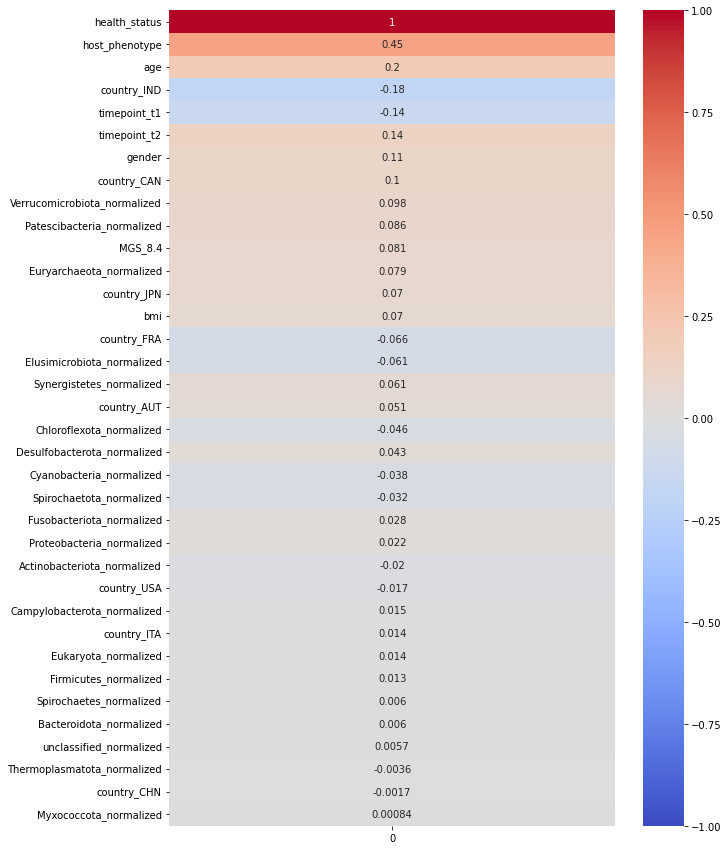

<Figure size 720x720 with 0 Axes>

In [209]:
# Is there any correlation between columns?
correlations = data_ph.corrwith(data_ph['health_status']).iloc[:].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
# Visualising results of the corr
# Sorted_correlations
fig, ax = plt.subplots(figsize=(10, 15))
plt.figure(figsize=(10, 10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, ax=ax)

In [211]:
anno_default.to_csv('anno.csv')

In [221]:
tax['class'].value_counts()

Clostridia             1080
Bacteroidia             361
Bacilli                 285
Gammaproteobacteria     126
Actinobacteria          104
Negativicutes           100
unclassified             90
Coriobacteriia           67
Fusobacteriia            34
Saccharimonadia          28
Vampirovibrionia         27
Campylobacteria          20
Desulfovibrionia         19
Spirochaetia             18
Alphaproteobacteria      16
Verrucomicrobiae         14
Lentisphaeria            13
Eukaryota                13
Synergistia              12
Flavobacteriia            7
Peptococcia               6
Thermoplasmata            5
Gracilibacteria           5
Elusimicrobia             4
Methanobacteria           4
Anaerolineae              2
Bradimonadia              1
Brachyspirae              1
Desulfobulbia             1
Kiritimatiellae           1
Name: class, dtype: int64

In [218]:
tax[tax['class'] == 'Clostridia']

,catalogue,Taxo_level,species,genus,family,order,class,phylum,superkingdom,knowledge
msp_0009,gut,species,Enterocloster bolteae,Enterocloster,Lachnospiraceae I,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
msp_0013,gut,species,Ruminococcus bicirculans,Ruminococcus 2,Ruminococcaceae,Clostridiales,Clostridia,Firmicutes,Bacteria,known
msp_0014,gut,species,Eisenbergiella tayi,Eisenbergiella,Lachnospiraceae G,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
msp_0015,gut,species,Agathobacter faecis,Agathobacter,Lachnospiraceae C,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
msp_0017,gut,species,Roseburia intestinalis,Roseburia,Lachnospiraceae C,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
...,...,...,...,...,...,...,...,...,...,...
msp_2848,oral,species,Finegoldia magna,Finegoldia,Helcococcaceae-Ezakiellaceae,Tissierellales,Clostridia,Firmicutes,Bacteria,known
msp_2931,oral,species,Eubacterium callanderi == [Butyribacterium] me...,Eubacterium,Eubacteriaceae,Eubacteriales,Clostridia,Firmicutes,Bacteria,known
msp_2933,oral,genus,unclassified Eubacterium 2,Eubacterium 2,Anaerovoracaceae,Peptostreptococcales,Clostridia,Firmicutes,Bacteria,unknown
msp_2934,oral,species,Lachnoanaerobaculum sp. ICM7,Lachnoanaerobaculum,Lachnospiraceae H,Lachnospirales,Clostridia,Firmicutes,Bacteria,unknown


In [219]:
tax['knowledge'].value_counts()

unknown    1868
known       596
Name: knowledge, dtype: int64

<AxesSubplot:>

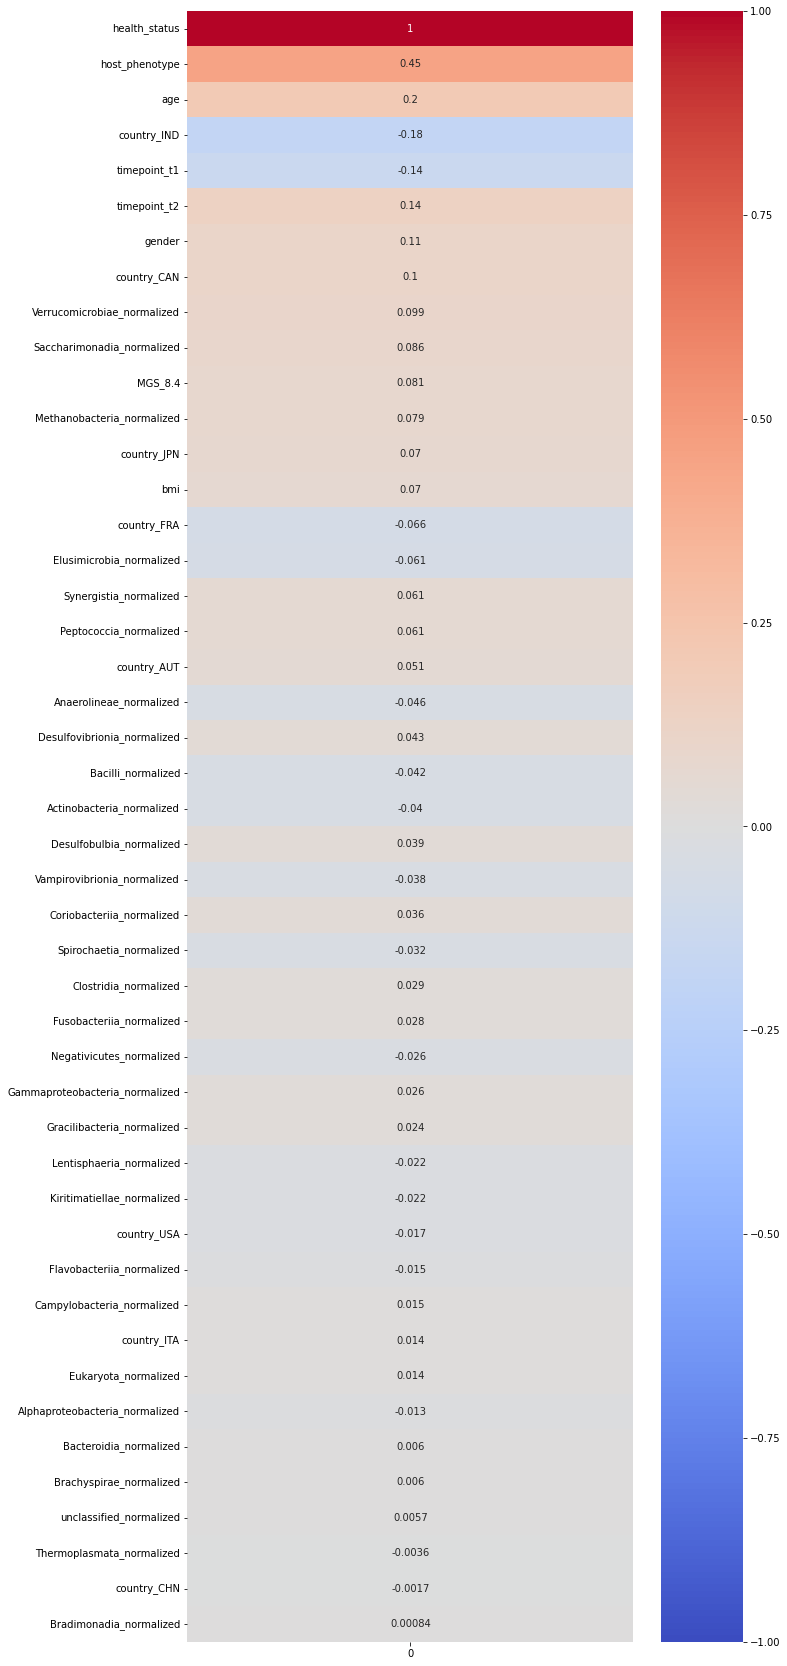

<Figure size 720x1440 with 0 Axes>

In [226]:
correlations = data_class.corrwith(data_class['health_status']).iloc[:].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
# Visualising results of the corr
# Sorted_correlations
fig, ax = plt.subplots(figsize=(10, 30))
plt.figure(figsize=(10, 20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, ax=ax)

In [230]:
data_class.columns

Index(['sample', 'MGS_8.4', 'health_status', 'host_phenotype', 'gender', 'age',
       'bmi', 'country_AUT', 'country_CAN', 'country_CHN', 'country_FRA',
       'country_IND', 'country_ITA', 'country_JPN', 'country_USA',
       'timepoint_t1', 'timepoint_t2', 'Eukaryota_normalized',
       'Bacteroidia_normalized', 'Gammaproteobacteria_normalized',
       'Clostridia_normalized', 'Verrucomicrobiae_normalized',
       'Lentisphaeria_normalized', 'Bacilli_normalized',
       'Desulfovibrionia_normalized', 'Negativicutes_normalized',
       'Vampirovibrionia_normalized', 'Actinobacteria_normalized',
       'Alphaproteobacteria_normalized', 'Fusobacteriia_normalized',
       'Synergistia_normalized', 'Brachyspirae_normalized',
       'Coriobacteriia_normalized', 'Methanobacteria_normalized',
       'Flavobacteriia_normalized', 'Campylobacteria_normalized',
       'Thermoplasmata_normalized', 'Spirochaetia_normalized',
       'Peptococcia_normalized', 'Kiritimatiellae_normalized',
       'E

In [232]:
X_class = data_class.drop(['sample', 'health_status', 'host_phenotype',
                           'country_AUT', 'country_CAN', 'country_CHN', 'country_FRA',
       'country_IND', 'country_ITA', 'country_JPN', 'country_USA',
                           'Bradimonadia_normalized', 'Thermoplasmata_normalized',
                           'unclassified_normalized', 'Brachyspirae_normalized',
                           'Bacteroidia_normalized'], axis=1)
y_class = data_class['health_status']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
lazy_class = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = lazy_class.fit(X_train_class, X_test_class, y_train_class, y_test_class)
models

100%|██████████| 29/29 [00:03<00:00,  9.65it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.64,0.65,0.65,0.64,0.28
RandomForestClassifier,0.60,0.60,0.60,0.60,0.48
BernoulliNB,0.58,0.59,0.59,0.58,0.02
NuSVC,0.58,0.59,0.59,0.58,0.11
ExtraTreeClassifier,0.58,0.59,0.59,0.58,0.02
AdaBoostClassifier,0.58,0.58,0.58,0.58,0.23
CalibratedClassifierCV,0.58,0.58,0.58,0.58,0.55
LinearDiscriminantAnalysis,0.57,0.57,0.57,0.57,0.03
RidgeClassifierCV,0.57,0.57,0.57,0.57,0.06


In [236]:
data[data['health_status'] == 0]

,sample,gut_mapped_pc,oral_mapped_pc,MGS_10.4,MGS_8.4,MGS_all,health_status,host_phenotype,gender,age,...,msp_2942,msp_2943,msp_2944,msp_2945,msp_2946,msp_2947,msp_2948,msp_2949,msp_2950,msp_2951
0,DRS087519,82.06,8.55,318,102,379,0,0,0,67.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,DRS087525,86.04,10.66,162,86,204,0,0,0,62.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12,DRS087531,84.97,7.77,167,72,201,0,0,1,77.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
16,DRS087536,84.08,28.79,121,94,169,0,0,0,78.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18,DRS087538,86.47,9.38,89,23,96,0,0,0,68.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,SRS3104958,83.14,26.15,252,64,282,0,0,1,66.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1184,SRS3104963,85.57,9.44,129,50,160,0,0,1,80.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1189,SRS3104969,85.87,5.92,241,35,262,0,0,0,80.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1192,SRS3104972,74.21,2.21,326,12,329,0,0,0,60.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [239]:
data_health = data[data['health_status'] == 0].T

In [252]:
data_labels = data_health.iloc[:1]
data_data = data_health.iloc[25:]

In [261]:
data_markers = pd.concat([data_labels, data_data], axis=0)

In [262]:
data_markers.columns = data_markers.iloc[0]

In [264]:
data_markers = data_markers[1:]

In [290]:
data_markers.head(2)

sample,DRS087519,DRS087525,DRS087531,DRS087536,DRS087538,DRS087539,DRS087543,DRS087546,DRS087547,DRS087549,...,SRS3104950,SRS3104951,SRS3104953,SRS3104954,SRS3104957,SRS3104958,SRS3104963,SRS3104969,SRS3104972,SRS3104974
msp_0001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_0002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [292]:
data_markers_new = data_markers.copy()
for col in data_markers:
    data_markers_new[f'{col}'] = (data_markers[col] - data_markers[col].min()) / (data_markers[col].max() - data_markers[col].min())
data_markers_new

sample,DRS087519,DRS087525,DRS087531,DRS087536,DRS087538,DRS087539,DRS087543,DRS087546,DRS087547,DRS087549,...,SRS3104950,SRS3104951,SRS3104953,SRS3104954,SRS3104957,SRS3104958,SRS3104963,SRS3104969,SRS3104972,SRS3104974
msp_0001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_0002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_0003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.07,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.10
msp_0004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_0005,0.77,0.02,0.03,0.16,0.01,0.06,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.02,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
msp_2947,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_2948,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_2949,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_2950,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [317]:
dictionary = {}
idx = 0
for row in data_markers_new.iterrows():
    spis = []
    for item in row[1:]:
        df = item.to_frame()
        for sample_row in df.iterrows():
            # print(sample_row)
            # print('\n//////////////\n')
            d = str(sample_row[1])
            name_val = d.split('\n')[0]
            name, val = name_val.split('   ')[0], name_val.split('   ')[1]
            # print(sample_row[0])
            if float(val) > 0:
                spis.append(name)
    dictionary[idx] = spis
    idx += 1


In [318]:
table = {}
for key in dictionary:
    for entry in dictionary[key]:
        if entry in table:
            num = table[entry]
            table[entry] = num + 1
        else:
            table[entry] = 1

In [319]:
df = pd.DataFrame.from_dict(table, orient='index')
df['sample'] = df.index
df.rename(columns={0:'count'}, inplace=True)
df

,count,sample
msp_0001,5,msp_0001
msp_0002,3,msp_0002
msp_0003,165,msp_0003
msp_0004,4,msp_0004
msp_0005,252,msp_0005
...,...,...
msp_2922,2,msp_2922
msp_2931,7,msp_2931
msp_2936,2,msp_2936
msp_2943,37,msp_2943


In [323]:
tax['sample'] = tax.index

In [324]:
df_merged = pd.merge(df, tax, on='sample', how='inner')

In [325]:
df_merged

,count,sample,catalogue,Taxo_level,species,genus,family,order,class,phylum,superkingdom,knowledge
0,5,msp_0001,gut,species,Blastocystis sp. subtype 3,Blastocystis,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,known
1,3,msp_0002,gut,species,Blastocystis sp. subtype 1,Blastocystis,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,known
2,165,msp_0003,gut,species,Bacteroides cellulosilyticus,Bacteroides,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
3,4,msp_0004,gut,species,Blastocystis sp. subtype 2,Blastocystis,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,known
4,252,msp_0005,gut & oral,species,Escherichia coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,known
...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2,msp_2922,oral,genus,unclassified Solobacterium,Solobacterium,Erysipelotrichaceae,Erysipelotrichales,Bacilli,Firmicutes,Bacteria,unknown
1711,7,msp_2931,oral,species,Eubacterium callanderi == [Butyribacterium] me...,Eubacterium,Eubacteriaceae,Eubacteriales,Clostridia,Firmicutes,Bacteria,known
1712,2,msp_2936,oral,species,Pseudomonas aeruginosa,Pseudomonas,Pseudomonadaceae,Pseudomonadales,Gammaproteobacteria,Proteobacteria,Bacteria,known
1713,37,msp_2943,oral,species,Veillonella dispar,Veillonella,Veillonellaceae,Veillonellales,Negativicutes,Firmicutes,Bacteria,known


In [331]:
df_sorted_health = df_merged.sort_values(by=['count'], ascending=False)
df_sorted_health

,count,sample,catalogue,Taxo_level,species,genus,family,order,class,phylum,superkingdom,knowledge
66,507,msp_0069,gut & oral,species,Bacteroides vulgatus,Bacteroides 3,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
73,474,msp_0076,gut,species,Blautia wexlerae,Blautia A,Lachnospiraceae K,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
43,467,msp_0046,gut,species,Bacteroides uniformis,Bacteroides,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
147,405,msp_0154,gut,species,Fusicatenibacter saccharivorans,Fusicatenibacter,Lachnospiraceae K,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
11,403,msp_0012,gut,species,Parabacteroides distasonis,Parabacteroides,Tannerellaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1,msp_1310,gut,genus,unclassified Lawsonibacter,Lawsonibacter,Oscillospirales 6,Oscillospirales,Clostridia,Firmicutes,Bacteria,unknown
1483,1,msp_1830,gut,genus,unclassified Muribaculaceae sp6,Muribaculaceae sp6,Muribaculaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,unknown
1481,1,msp_1828,gut,genus,unclassified Prevotellamassilia,Prevotellamassilia,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,unknown
1167,1,msp_1316,gut,family,unclassified Clostridiales 1b,unclassified Clostridiales 1b,Clostridiales 1b,Clostridiales 1,Clostridia,Firmicutes,Bacteria,unknown


In [328]:
data_ill = data[data['health_status'] != 0].T
data_labels = data_ill.iloc[:1]
data_data = data_ill.iloc[25:]
data_markers = pd.concat([data_labels, data_data], axis=0)
data_markers.columns = data_markers.iloc[0]
data_markers = data_markers[1:]
data_markers_new = data_markers.copy()
for col in data_markers:
    data_markers_new[f'{col}'] = (data_markers[col] - data_markers[col].min()) / (
                data_markers[col].max() - data_markers[col].min())
data_markers_new

sample,DRS087520,DRS087521,DRS087522,DRS087523,DRS087524,DRS087526,DRS087527,DRS087528,DRS087529,DRS087530,...,SRS4597847,SRS4597853,SRS4597854,SRS4597856,SRS4597857,SRS4597858,SRS4597860,SRS4597862,SRS4597863,SRS4597869
msp_0001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_0002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
msp_0003,0.00,0.98,0.00,0.01,0.00,0.00,0.02,0.26,0.12,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
msp_0004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_0005,0.29,0.00,0.00,0.00,0.01,0.04,0.24,0.00,0.07,0.00,...,1.00,0.00,0.00,0.06,0.00,0.01,0.19,0.04,0.04,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
msp_2947,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_2948,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_2949,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
msp_2950,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [330]:
dictionary = {}
idx = 0
for row in data_markers_new.iterrows():
    spis = []
    for item in row[1:]:
        df = item.to_frame()
        for sample_row in df.iterrows():
            # print(sample_row)
            # print('\n//////////////\n')
            d = str(sample_row[1])
            name_val = d.split('\n')[0]
            name, val = name_val.split('   ')[0], name_val.split('   ')[1]
            # print(sample_row[0])
            if float(val) > 0:
                spis.append(name)
    dictionary[idx] = spis
    idx += 1


table = {}
for key in dictionary:
    for entry in dictionary[key]:
        if entry in table:
            num = table[entry]
            table[entry] = num + 1
        else:
            table[entry] = 1


df = pd.DataFrame.from_dict(table, orient='index')
df['sample'] = df.index
df.rename(columns={0: 'count'}, inplace=True)
df_merged_ill = pd.merge(df, tax, on='sample', how='inner')
df_sorted_ill = df_merged_ill.sort_values(by=['count'], ascending=False)
df_sorted_ill

,count,sample,catalogue,Taxo_level,species,genus,family,order,class,phylum,superkingdom,knowledge
64,533,msp_0069,gut & oral,species,Bacteroides vulgatus,Bacteroides 3,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
71,505,msp_0076,gut,species,Blautia wexlerae,Blautia A,Lachnospiraceae K,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
42,502,msp_0046,gut,species,Bacteroides uniformis,Bacteroides,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
10,438,msp_0012,gut,species,Parabacteroides distasonis,Parabacteroides,Tannerellaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
146,436,msp_0154,gut,species,Fusicatenibacter saccharivorans,Fusicatenibacter,Lachnospiraceae K,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,msp_1419,gut,genus,unclassified Sutterella,Sutterella,Burkholderiaceae,Burkholderiales,Gammaproteobacteria,Proteobacteria,Bacteria,unknown
1511,1,msp_1908,gut,genus,unclassified Clostridioides,Clostridioides,Peptostreptococcaceae,Peptostreptococcales,Clostridia,Firmicutes,Bacteria,unknown
1124,1,msp_1271,gut,genus,unclassified Ruminococcus,Ruminococcus,Ruminococcaceae,Clostridiales,Clostridia,Firmicutes,Bacteria,unknown
1346,1,msp_1606c,gut,species,Olsenella sp. KH3B4,Olsenella,Atopobiaceae,Coriobacteriales,Coriobacteriia,Actinobacteriota,Bacteria,unknown


In [336]:
health_list = df_sorted_health[df_sorted_health['count'] > 50]['sample'].tolist()
ill_list = df_sorted_ill[df_sorted_ill['count'] > 50]['sample'].tolist()

In [337]:
health_list, ill_list

(['msp_0069',
  'msp_0076',
  'msp_0046',
  'msp_0154',
  'msp_0012',
  'msp_0388',
  'msp_0068',
  'msp_1244',
  'msp_0107',
  'msp_0011',
  'msp_0389',
  'msp_0072',
  'msp_0769',
  'msp_0468',
  'msp_0007',
  'msp_0208',
  'msp_0166',
  'msp_0301',
  'msp_0506',
  'msp_0124',
  'msp_0436',
  'msp_0374',
  'msp_0029',
  'msp_0015',
  'msp_0027',
  'msp_0090',
  'msp_0075',
  'msp_0259',
  'msp_0062',
  'msp_0346',
  'msp_0045',
  'msp_0331',
  'msp_0484',
  'msp_0893',
  'msp_0141',
  'msp_0152',
  'msp_0126',
  'msp_0213',
  'msp_0023',
  'msp_0380',
  'msp_0763',
  'msp_0035',
  'msp_0125',
  'msp_0196',
  'msp_0110',
  'msp_0263',
  'msp_0005',
  'msp_0058',
  'msp_0898',
  'msp_0530',
  'msp_0050',
  'msp_0031',
  'msp_0032',
  'msp_0236',
  'msp_0307',
  'msp_0059',
  'msp_0021',
  'msp_0079',
  'msp_0478',
  'msp_0477',
  'msp_0017',
  'msp_0188',
  'msp_0572',
  'msp_0013',
  'msp_0172',
  'msp_0055',
  'msp_0071',
  'msp_0903',
  'msp_0087',
  'msp_0456',
  'msp_0591',
  'msp

In [338]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [340]:
common = intersection(health_list, ill_list)

In [341]:
print('Healthy:', len(health_list), '\nIll:', len(ill_list), '\nCommon:', len(common))

Healthy: 267 
Ill: 277 
Common: 253


In [347]:
specific = [sample for sample in ill_list if sample not in common]
df_ill = tax[tax['sample'].isin(specific)]

In [348]:
df_common = tax[tax['sample'].isin(common)]

In [350]:
df_ill.to_csv('tax_ill.csv')

In [351]:
df_common.to_csv('tax_common.csv')

In [361]:
sel = ['count', 'sample']
d1 = df_sorted_ill[df_sorted_ill['sample'].isin(common)][sel]
d2 = df_sorted_health[df_sorted_health['sample'].isin(common)][sel]
d3 = pd.merge(d1, d2, on='sample', how='inner')

In [356]:
df_sorted_health

,count,sample,catalogue,Taxo_level,species,genus,family,order,class,phylum,superkingdom,knowledge
66,507,msp_0069,gut & oral,species,Bacteroides vulgatus,Bacteroides 3,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
73,474,msp_0076,gut,species,Blautia wexlerae,Blautia A,Lachnospiraceae K,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
43,467,msp_0046,gut,species,Bacteroides uniformis,Bacteroides,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
147,405,msp_0154,gut,species,Fusicatenibacter saccharivorans,Fusicatenibacter,Lachnospiraceae K,Lachnospirales,Clostridia,Firmicutes,Bacteria,known
11,403,msp_0012,gut,species,Parabacteroides distasonis,Parabacteroides,Tannerellaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,known
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1,msp_1310,gut,genus,unclassified Lawsonibacter,Lawsonibacter,Oscillospirales 6,Oscillospirales,Clostridia,Firmicutes,Bacteria,unknown
1483,1,msp_1830,gut,genus,unclassified Muribaculaceae sp6,Muribaculaceae sp6,Muribaculaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,unknown
1481,1,msp_1828,gut,genus,unclassified Prevotellamassilia,Prevotellamassilia,Bacteroidaceae,Bacteroidales,Bacteroidia,Bacteroidota,Bacteria,unknown
1167,1,msp_1316,gut,family,unclassified Clostridiales 1b,unclassified Clostridiales 1b,Clostridiales 1b,Clostridiales 1,Clostridia,Firmicutes,Bacteria,unknown


In [364]:
d3.rename(columns={'count_x':'count_ill', 'count_y':'count_health'}, inplace=True)

In [365]:
d3

,count_ill,sample,count_health
0,533,msp_0069,507
1,505,msp_0076,474
2,502,msp_0046,467
3,438,msp_0012,403
4,436,msp_0154,405
...,...,...,...
248,55,msp_0224,64
249,54,msp_1033,55
250,53,msp_0623,65
251,53,msp_0576,68


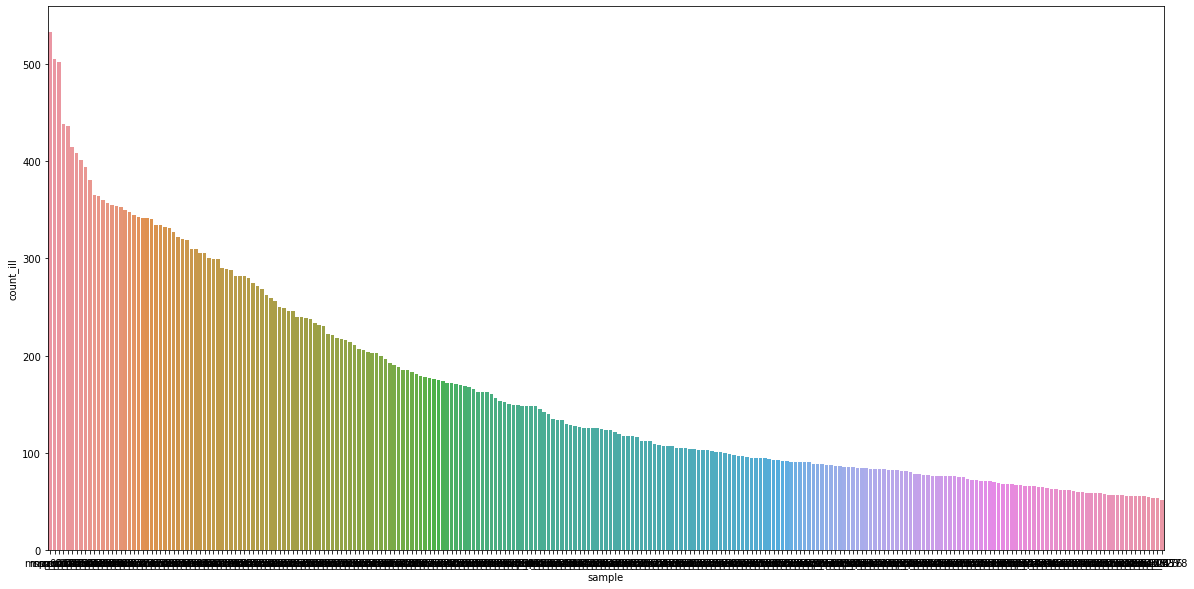

In [374]:
plt.figure(figsize=(20, 10))
sns.barplot(x='sample', y='count_ill', data = d3)
plt.savefig('ill.png')

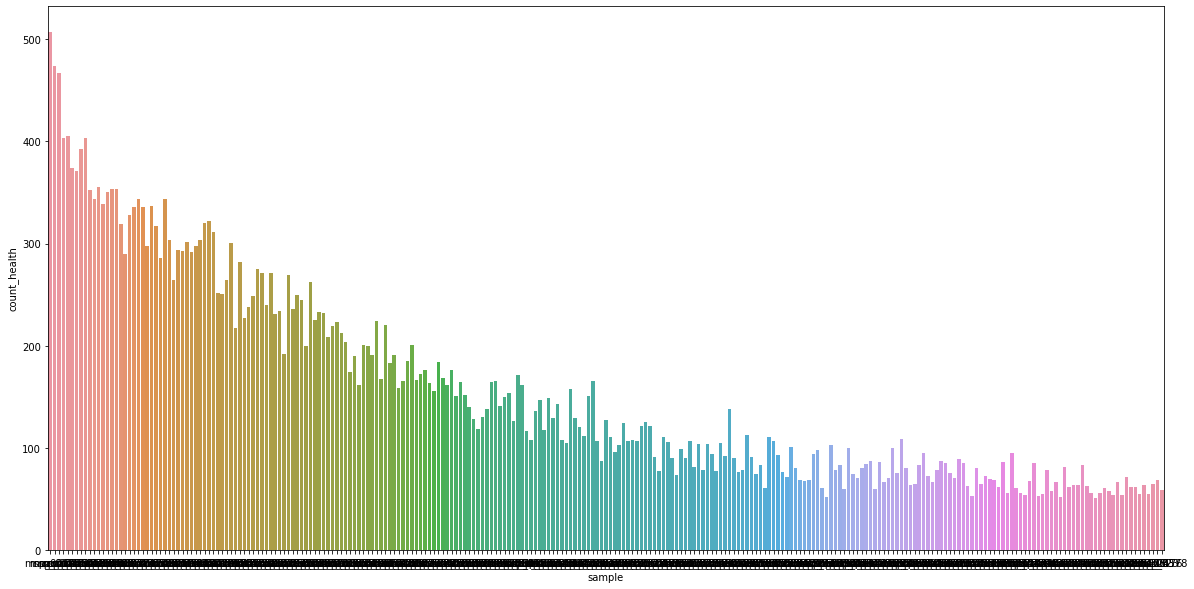

In [373]:
plt.figure(figsize=(20, 10))
sns.barplot(x='sample', y='count_health', data = d3)
plt.savefig('health.png')

In [375]:
d3

,count_ill,sample,count_health
0,533,msp_0069,507
1,505,msp_0076,474
2,502,msp_0046,467
3,438,msp_0012,403
4,436,msp_0154,405
...,...,...,...
248,55,msp_0224,64
249,54,msp_1033,55
250,53,msp_0623,65
251,53,msp_0576,68


In [376]:
d3['difference'] = abs(d3['count_ill'] - d3['count_health'])

In [377]:
d3

,count_ill,sample,count_health,difference
0,533,msp_0069,507,26
1,505,msp_0076,474,31
2,502,msp_0046,467,35
3,438,msp_0012,403,35
4,436,msp_0154,405,31
...,...,...,...,...
248,55,msp_0224,64,9
249,54,msp_1033,55,1
250,53,msp_0623,65,12
251,53,msp_0576,68,15


In [380]:
df_sorted_health.to_csv('tax_health_full.csv')

In [381]:
df_sorted_ill.to_csv('tax_ill_full.csv')